In [3]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../"))  # Add directory
import eval_metrics  # Import module

# Reload if modified
importlib.reload(eval_metrics)
from eval_metrics import evaluate_model, custom_threshold_condition

### Dataset 1: Toxiccomment

In [4]:
detoxify = pd.read_csv("detoxify_toxiccomment.csv")
detoxify.head()

,id,comment_text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,true_label,pred_label
0,55858b89f99e9bda,Hope he dies \n\nNow this Atheist filth's wife...,0.986712,0.335980,0.447004,0.918513,0.740147,0.489629,1,1
1,425a1dbdf740e9b8,"2006 (UTC)\n\n Removed Merge 17:15, 5 April",0.000681,0.000113,0.000177,0.000119,0.000180,0.000138,0,0
2,20c81b99f7adf557,John discuss it here \n\nSeems you don't like ...,0.000605,0.000124,0.000180,0.000128,0.000171,0.000143,0,0
3,af0dce6ce84974ec,"""\nTo answer your question, no. There is no si...",0.000583,0.000123,0.000183,0.000124,0.000176,0.000138,0,0
4,a069e6d6d1a2348d,"""\n But Arpad can cite any webpage he finds, o...",0.000645,0.000118,0.000177,0.000119,0.000179,0.000140,0,0


In [12]:
print(detoxify['true_label'].value_counts())
print(detoxify['pred_label'].value_counts())

true_label
1    689
0    689
Name: count, dtype: int64
pred_label
0    739
1    639
Name: count, dtype: int64


In [8]:
detoxify['pred_label'] = ((detoxify['threat'] >= 0.5) | (detoxify['identity_attack'] >= 0.5)).astype(int)

In [10]:
detoxify.head()

,id,comment_text,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,true_label,pred_label
0,55858b89f99e9bda,Hope he dies \n\nNow this Atheist filth's wife...,0.986712,0.335980,0.447004,0.918513,0.740147,0.489629,1,1
1,425a1dbdf740e9b8,"2006 (UTC)\n\n Removed Merge 17:15, 5 April",0.000681,0.000113,0.000177,0.000119,0.000180,0.000138,0,0
2,20c81b99f7adf557,John discuss it here \n\nSeems you don't like ...,0.000605,0.000124,0.000180,0.000128,0.000171,0.000143,0,0
3,af0dce6ce84974ec,"""\nTo answer your question, no. There is no si...",0.000583,0.000123,0.000183,0.000124,0.000176,0.000138,0,0
4,a069e6d6d1a2348d,"""\n But Arpad can cite any webpage he finds, o...",0.000645,0.000118,0.000177,0.000119,0.000179,0.000140,0,0



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.92      0.99      0.95       689
      Threat       0.98      0.91      0.95       689

    accuracy                           0.95      1378
   macro avg       0.95      0.95      0.95      1378
weighted avg       0.95      0.95      0.95      1378


✅ Accuracy: 0.9492
✅ Precision: 0.9844
✅ Recall: 0.9129
✅ F1 Score: 0.9473


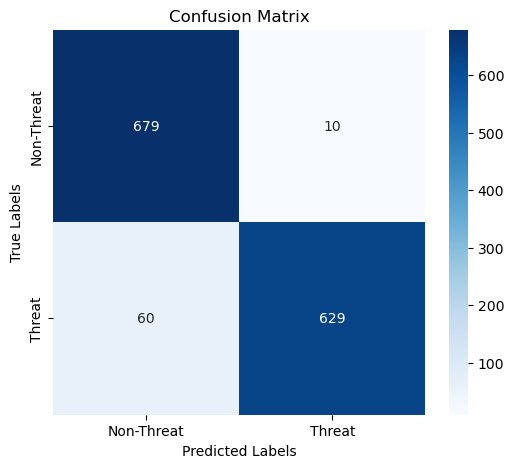

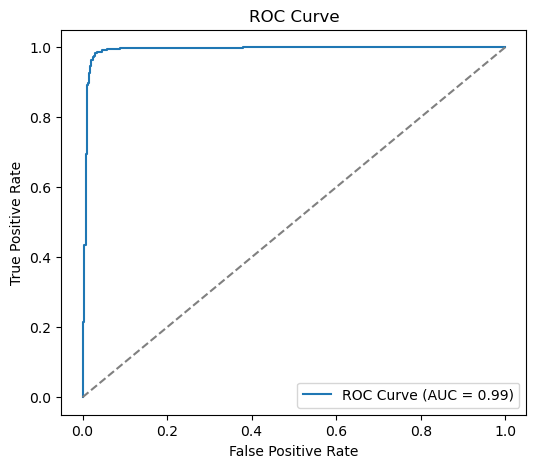

✅ AUC Score: 0.9917


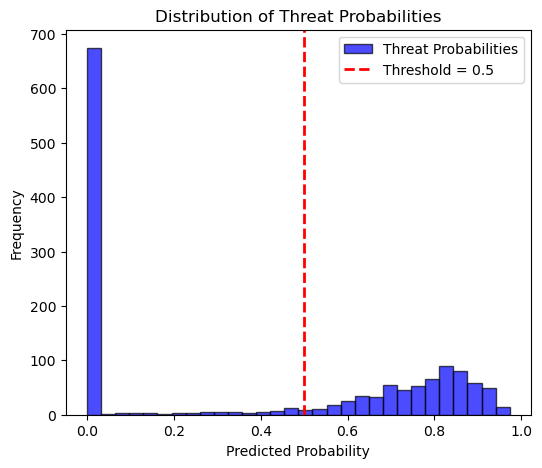

In [89]:
# Threshold=0.5
evaluate_model(detoxify['true_label'].to_numpy(),y_probs=detoxify[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.5,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.76      0.99      0.86       689
      Threat       0.99      0.70      0.82       689

    accuracy                           0.84      1378
   macro avg       0.88      0.84      0.84      1378
weighted avg       0.88      0.84      0.84      1378


✅ Accuracy: 0.8433
✅ Precision: 0.9876
✅ Recall: 0.6952
✅ F1 Score: 0.8160


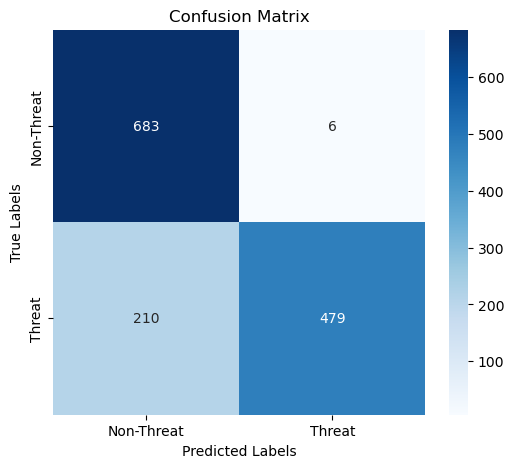

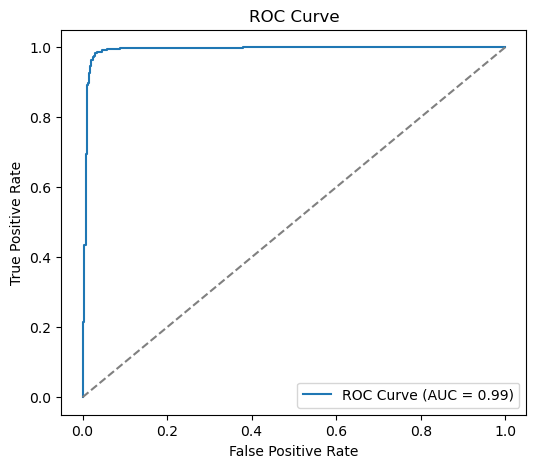

✅ AUC Score: 0.9917


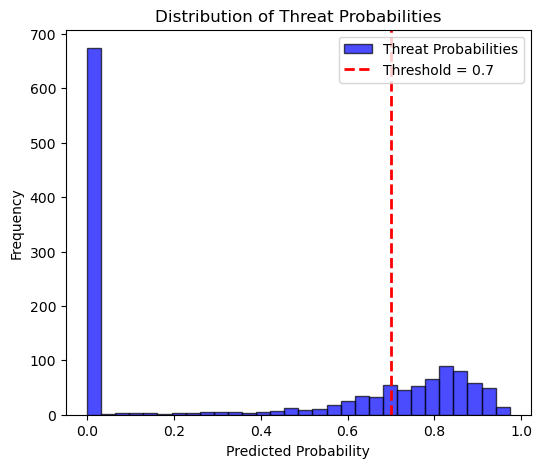

In [91]:
# Threshold=0.7
evaluate_model(detoxify['true_label'].to_numpy(),y_probs=detoxify[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.7,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.53      1.00      0.69       689
      Threat       0.99      0.11      0.20       689

    accuracy                           0.56      1378
   macro avg       0.76      0.56      0.45      1378
weighted avg       0.76      0.56      0.45      1378


✅ Accuracy: 0.5559
✅ Precision: 0.9873
✅ Recall: 0.1132
✅ F1 Score: 0.2031


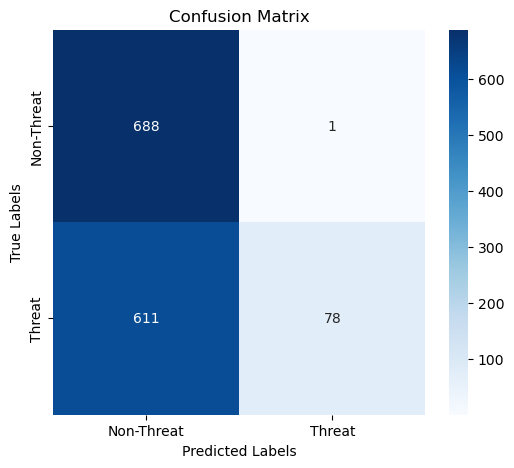

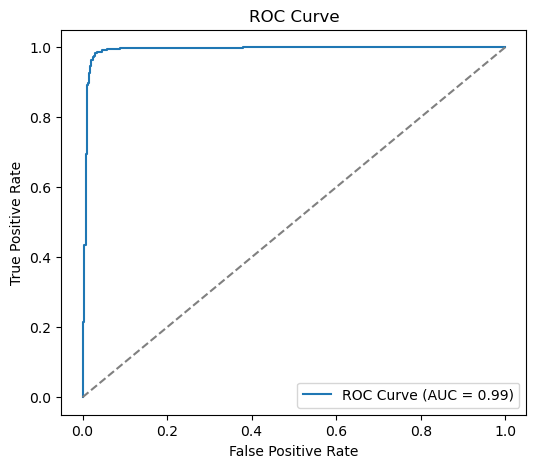

✅ AUC Score: 0.9917


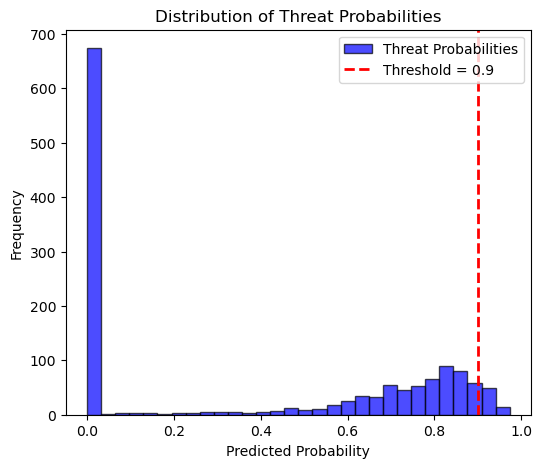

In [93]:
# Threshold=0.9
evaluate_model(detoxify['true_label'].to_numpy(),y_probs=detoxify[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.9,custom_condition=custom_threshold_condition)

In [5]:
detoxify_unbiased = pd.read_csv('detoxify_unbiased_toxiccomment.csv')
detoxify_unbiased.head()

,id,comment_text,true_label,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit,pred_label
0,55858b89f99e9bda,Hope he dies \n\nNow this Atheist filth's wife...,1,0.976251,0.006515,0.064793,0.107087,0.504929,0.755125,0.003148,1
1,425a1dbdf740e9b8,"2006 (UTC)\n\n Removed Merge 17:15, 5 April",0,0.000536,0.000003,0.000056,0.000099,0.000071,0.000025,0.000023,0
2,20c81b99f7adf557,John discuss it here \n\nSeems you don't like ...,0,0.002967,0.000009,0.000249,0.000203,0.000120,0.000089,0.000130,0
3,af0dce6ce84974ec,"""\nTo answer your question, no. There is no si...",0,0.001307,0.000007,0.000141,0.000148,0.000077,0.000063,0.000097,0
4,a069e6d6d1a2348d,"""\n But Arpad can cite any webpage he finds, o...",0,0.000487,0.000002,0.000041,0.000078,0.000081,0.000019,0.000020,0



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.74      0.99      0.84       689
      Threat       0.98      0.64      0.78       689

    accuracy                           0.82      1378
   macro avg       0.86      0.82      0.81      1378
weighted avg       0.86      0.82      0.81      1378


✅ Accuracy: 0.8157
✅ Precision: 0.9801
✅ Recall: 0.6444
✅ F1 Score: 0.7776


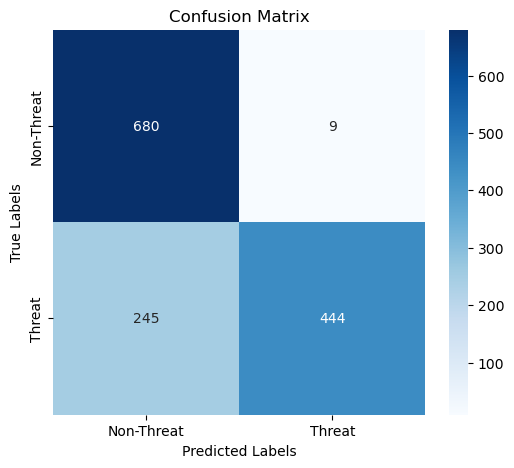

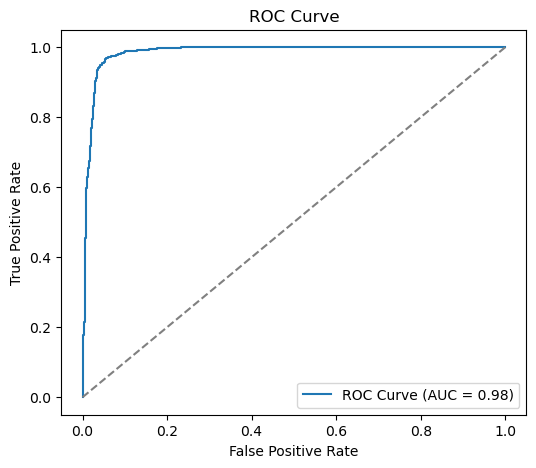

✅ AUC Score: 0.9848


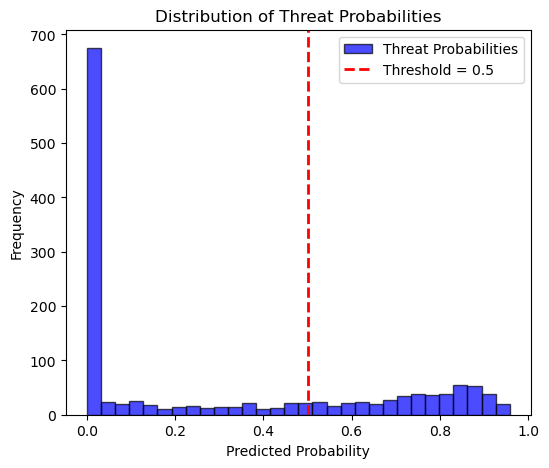

In [85]:
# Theshold 0.5
evaluate_model(y_true=detoxify_unbiased['true_label'].to_numpy(), y_probs=detoxify_unbiased[['threat','identity_attack']].to_numpy(), class_labels=['Not Threat','Threat'],threshold=0.5,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.64      0.99      0.78       689
      Threat       0.99      0.45      0.62       689

    accuracy                           0.72      1378
   macro avg       0.82      0.72      0.70      1378
weighted avg       0.82      0.72      0.70      1378


✅ Accuracy: 0.7221
✅ Precision: 0.9873
✅ Recall: 0.4499
✅ F1 Score: 0.6181


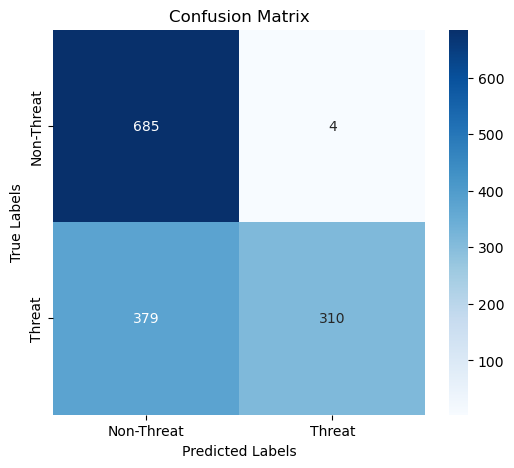

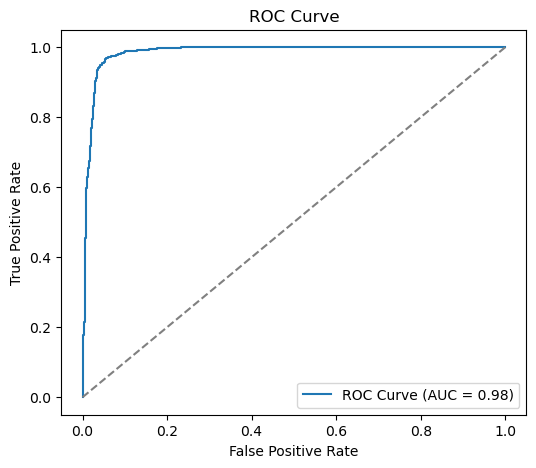

✅ AUC Score: 0.9848


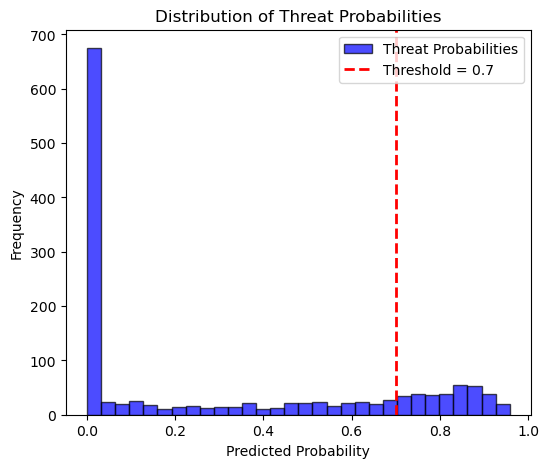

In [87]:
# Theshold 0.7
evaluate_model(y_true=detoxify_unbiased['true_label'].to_numpy(), y_probs=detoxify_unbiased[['threat','identity_attack']].to_numpy(), class_labels=['threat','identity_attack'],threshold=0.7,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.52      1.00      0.68       689
      Threat       1.00      0.07      0.13       689

    accuracy                           0.53      1378
   macro avg       0.76      0.53      0.41      1378
weighted avg       0.76      0.53      0.41      1378


✅ Accuracy: 0.5348
✅ Precision: 1.0000
✅ Recall: 0.0697
✅ F1 Score: 0.1303


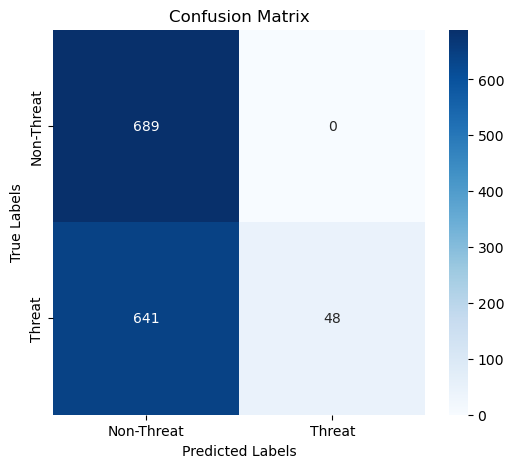

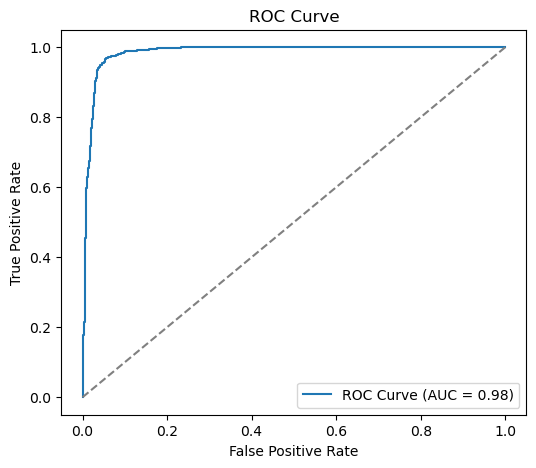

✅ AUC Score: 0.9848


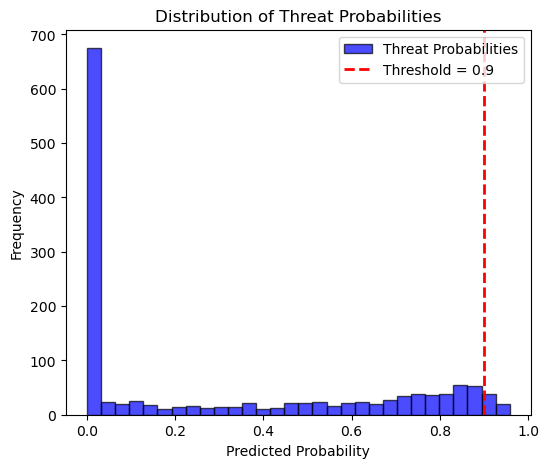

In [7]:
# Theshold 0.9
evaluate_model(y_true=detoxify_unbiased['true_label'].to_numpy(), y_probs=detoxify_unbiased[['threat','identity_attack']].to_numpy(), class_labels=['threat','identity_attack'],threshold=0.9,custom_condition=custom_threshold_condition)

### Dataset 2: Jigsaw

In [95]:
detoxify_jigsaw = pd.read_csv("detoxify_jigsaw.csv")
detoxify_jigsaw.head()

,id,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,Threat_Jigsaw,toxicity_annotator_count,threat
0,627762,OH yes - Were those evil Christian Missionarie...,0.034860,0.000580,0.001227,0.000000,0.009809,0.003477,0.0,10,0.000696
1,5137126,Blame men. There's always an excuse to blame ...,0.030388,0.000121,0.000582,0.000000,0.000539,0.000892,0.0,11,0.000230
2,855753,And the woman exposing herself saying grab thi...,0.926792,0.045506,0.794269,0.628571,0.208452,0.474446,0.0,70,0.007903
3,379144,You have no business making any comments on th...,0.895996,0.009237,0.228434,0.000000,0.166109,0.422160,0.0,74,0.007901
4,641883,I guess the issue is people not willing to put...,0.572338,0.000951,0.059534,0.000000,0.002842,0.080267,0.0,68,0.000775


In [113]:
detoxify_jigsaw['true_label'] = (detoxify_jigsaw['Threat_Jigsaw']>=0.5).astype(int)

In [125]:
# Assuming detoxify_jigsaw DataFrame is already loaded
# Check the count of true labels
label_counts = detoxify_jigsaw['true_label'].value_counts()

# Determine the number of samples needed to balance
min_count = label_counts[1]  # Count of '1' labels
num_zeros = label_counts[0]  # Count of '0' labels

# If there are more '0' labels, downsample them to match '1' count
if num_zeros > min_count:
    df_ones = detoxify_jigsaw[detoxify_jigsaw['true_label'] == 1]
    df_zeros = detoxify_jigsaw[detoxify_jigsaw['true_label'] == 0].sample(n=min_count, random_state=42)
    
    # Combine balanced dataset
    balanced_df = pd.concat([df_ones, df_zeros]).sample(frac=1, random_state=42).reset_index(drop=True)
else:
    balanced_df = detoxify_jigsaw.copy()  # No downsampling needed if already balanced

balanced_df['true_label'].value_counts()
detoxify_jigsaw=balanced_df.copy()

In [123]:
balanced_df.to_csv("detoxify_jigsaw.csv",index=False)

In [115]:
detoxify_jigsaw.head()

,id,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,Threat_Jigsaw,toxicity_annotator_count,threat,true_label
0,627762,OH yes - Were those evil Christian Missionarie...,0.034860,0.000580,0.001227,0.000000,0.009809,0.003477,0.0,10,0.000696,0
1,5137126,Blame men. There's always an excuse to blame ...,0.030388,0.000121,0.000582,0.000000,0.000539,0.000892,0.0,11,0.000230,0
2,855753,And the woman exposing herself saying grab thi...,0.926792,0.045506,0.794269,0.628571,0.208452,0.474446,0.0,70,0.007903,0
3,379144,You have no business making any comments on th...,0.895996,0.009237,0.228434,0.000000,0.166109,0.422160,0.0,74,0.007901,0
4,641883,I guess the issue is people not willing to put...,0.572338,0.000951,0.059534,0.000000,0.002842,0.080267,0.0,68,0.000775,0



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.55      0.99      0.70       498
      Threat       0.97      0.17      0.29       498

    accuracy                           0.58       996
   macro avg       0.76      0.58      0.50       996
weighted avg       0.76      0.58      0.50       996


✅ Accuracy: 0.5823
✅ Precision: 0.9659
✅ Recall: 0.1707
✅ F1 Score: 0.2901


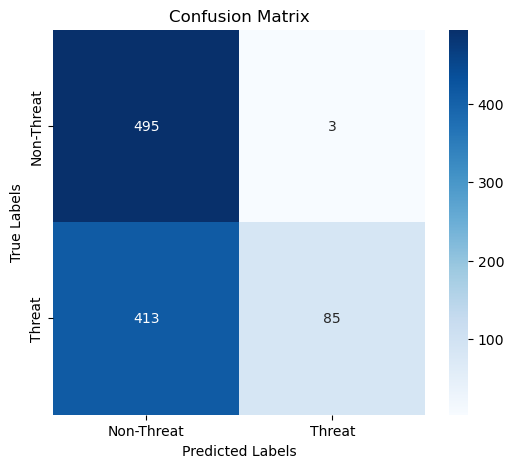

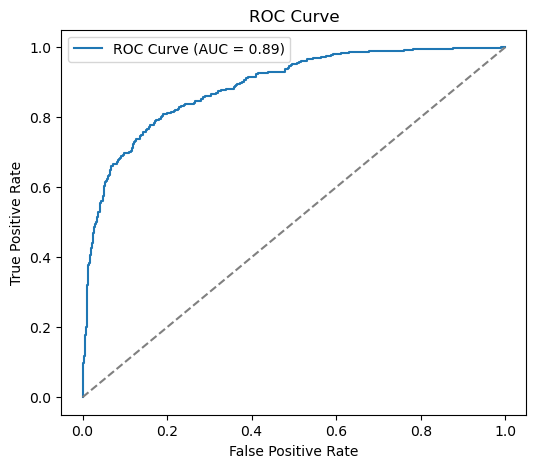

✅ AUC Score: 0.8879


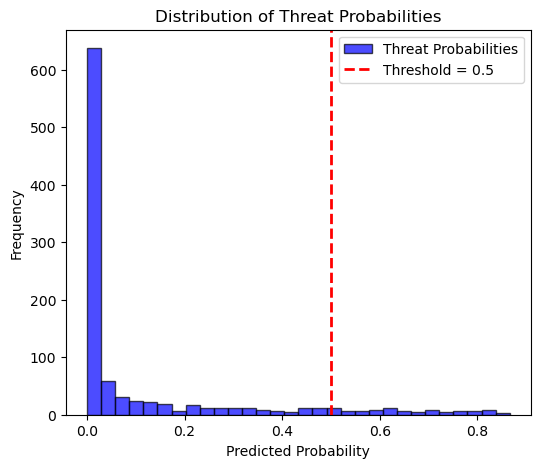

In [127]:
# Thrshold=0.5
evaluate_model(detoxify_jigsaw['true_label'].to_numpy(),y_probs=detoxify_jigsaw[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.5,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.65      0.97      0.78       498
      Threat       0.95      0.49      0.64       498

    accuracy                           0.73       996
   macro avg       0.80      0.73      0.71       996
weighted avg       0.80      0.73      0.71       996


✅ Accuracy: 0.7289
✅ Precision: 0.9453
✅ Recall: 0.4859
✅ F1 Score: 0.6419


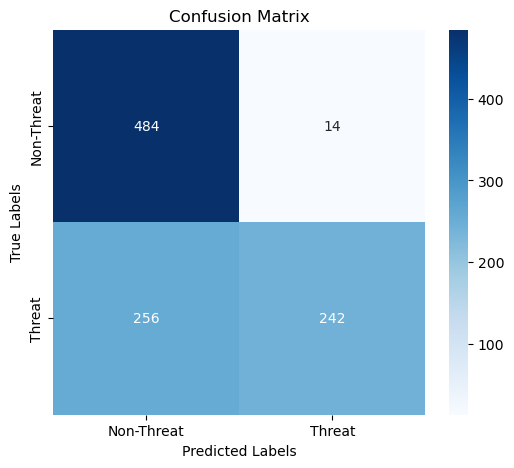

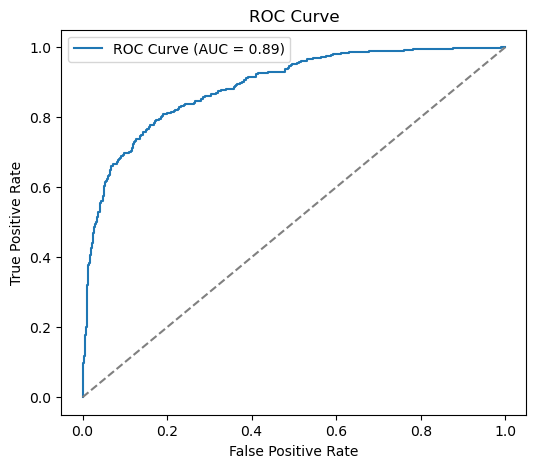

✅ AUC Score: 0.8879


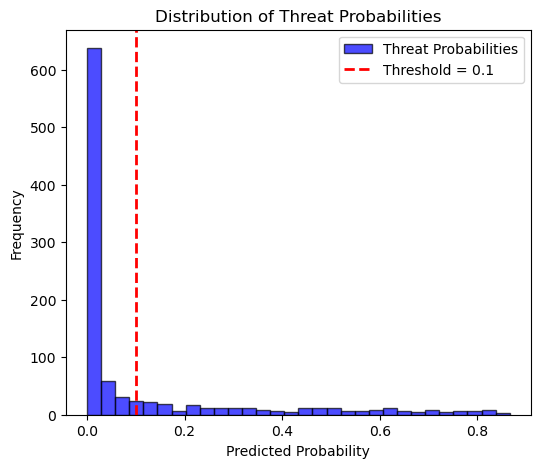

In [129]:
# Thrshold=0.1
evaluate_model(detoxify_jigsaw['true_label'].to_numpy(),y_probs=detoxify_jigsaw[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.1,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.76      0.88      0.82       498
      Threat       0.85      0.73      0.79       498

    accuracy                           0.80       996
   macro avg       0.81      0.80      0.80       996
weighted avg       0.81      0.80      0.80       996


✅ Accuracy: 0.8022
✅ Precision: 0.8541
✅ Recall: 0.7289
✅ F1 Score: 0.7866


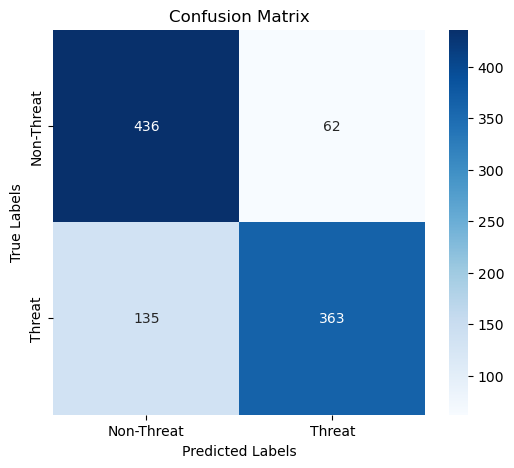

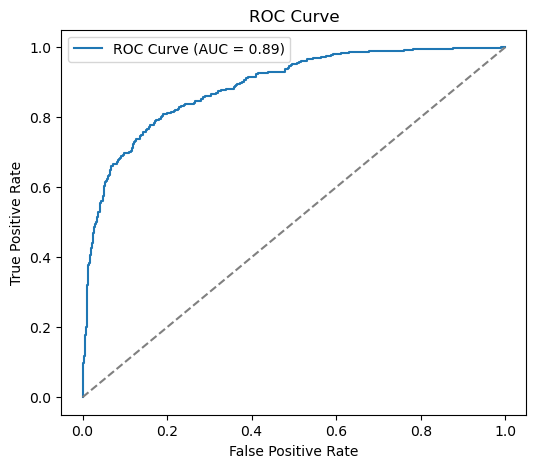

✅ AUC Score: 0.8879


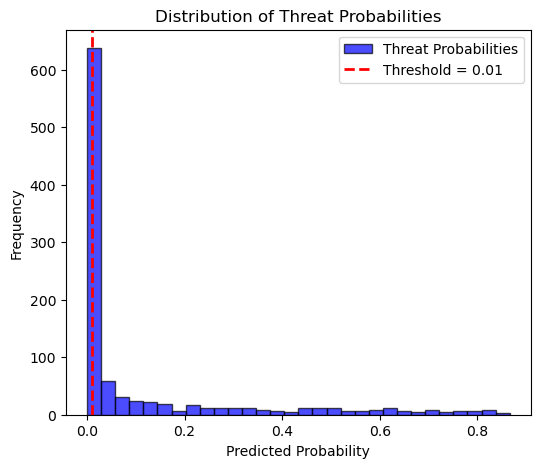

In [133]:
# Thrshold=0.01
evaluate_model(detoxify_jigsaw['true_label'].to_numpy(),y_probs=detoxify_jigsaw[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.01,custom_condition=custom_threshold_condition)

In [139]:
detoxify_unbiased = pd.read_csv("detoxify_unbiased_jigsaw.csv")
detoxify_unbiased.head()

,id,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,Threat_Jigsaw,toxicity_annotator_count,unbiased_toxicity,unbiased_severe_toxicity,unbiased_obscene,unbiased_identity_attack,unbiased_insult,unbiased_threat,unbiased_sexual_explicit
0,627762,OH yes - Were those evil Christian Missionarie...,0.800000,0.000000,0.000000,0.000000,0.700000,0.500000,0.0,10,0.680323,0.000821,0.004664,0.647433,0.381809,0.004384,0.001478
1,5137126,Blame men. There's always an excuse to blame ...,0.545455,0.000000,0.000000,0.000000,0.636364,0.272727,0.0,11,0.135540,0.000167,0.000556,0.234763,0.014383,0.002641,0.004397
2,855753,And the woman exposing herself saying grab thi...,0.728571,0.000000,0.600000,0.628571,0.114286,0.300000,0.0,70,0.936026,0.040470,0.872100,0.024408,0.225219,0.005477,0.919514
3,379144,You have no business making any comments on th...,0.594595,0.027027,0.040541,0.000000,0.121622,0.581081,0.0,74,0.981255,0.000218,0.001696,0.039955,0.965053,0.000228,0.001291
4,641883,I guess the issue is people not willing to put...,0.764706,0.014706,0.117647,0.000000,0.000000,0.720588,0.0,68,0.985641,0.000128,0.003835,0.002144,0.977322,0.000212,0.000477


In [143]:
detoxify_unbiased['true_label'] = (detoxify_unbiased['Threat_Jigsaw']>=0.5).astype(int)

In [145]:
# Assuming detoxify_jigsaw DataFrame is already loaded
# Check the count of true labels
label_counts = detoxify_unbiased['true_label'].value_counts()

# Determine the number of samples needed to balance
min_count = label_counts[1]  # Count of '1' labels
num_zeros = label_counts[0]  # Count of '0' labels

# If there are more '0' labels, downsample them to match '1' count
if num_zeros > min_count:
    df_ones = detoxify_unbiased[detoxify_unbiased['true_label'] == 1]
    df_zeros = detoxify_unbiased[detoxify_unbiased['true_label'] == 0].sample(n=min_count, random_state=42)
    
    # Combine balanced dataset
    balanced_df = pd.concat([df_ones, df_zeros]).sample(frac=1, random_state=42).reset_index(drop=True)
else:
    balanced_df = detoxify_jigsaw.copy()  # No downsampling needed if already balanced

balanced_df['true_label'].value_counts()
detoxify_unbiased=balanced_df.copy()


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.67      0.99      0.80       498
      Threat       0.98      0.52      0.68       498

    accuracy                           0.76       996
   macro avg       0.83      0.76      0.74       996
weighted avg       0.83      0.76      0.74       996


✅ Accuracy: 0.7560
✅ Precision: 0.9811
✅ Recall: 0.5221
✅ F1 Score: 0.6815


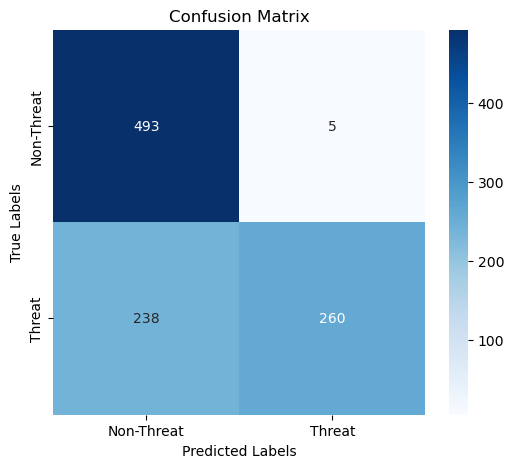

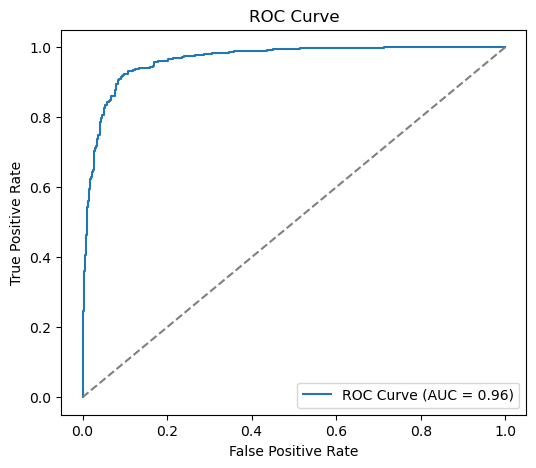

✅ AUC Score: 0.9635


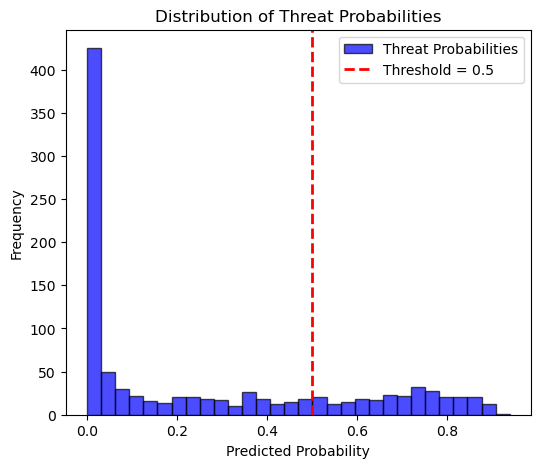

In [149]:
# Thrshold=0.5
evaluate_model(detoxify_unbiased['true_label'].to_numpy(),y_probs=detoxify_unbiased[['unbiased_threat', 'unbiased_identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.5,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.90      0.92      0.91       498
      Threat       0.91      0.90      0.91       498

    accuracy                           0.91       996
   macro avg       0.91      0.91      0.91       996
weighted avg       0.91      0.91      0.91       996


✅ Accuracy: 0.9086
✅ Precision: 0.9145
✅ Recall: 0.9016
✅ F1 Score: 0.9080


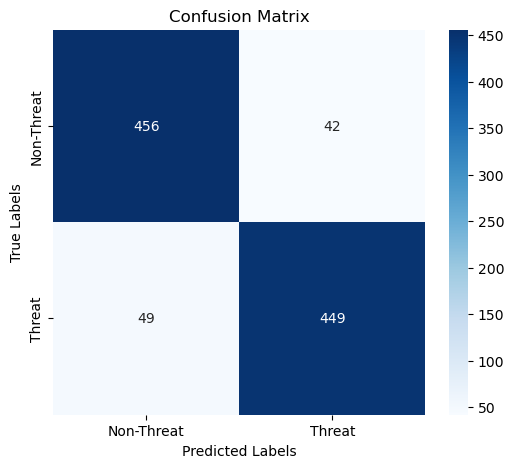

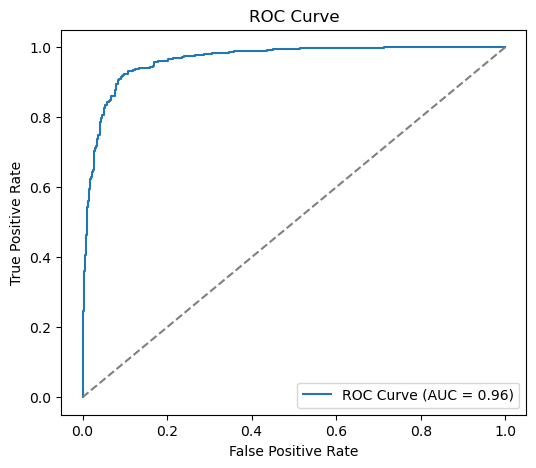

✅ AUC Score: 0.9635


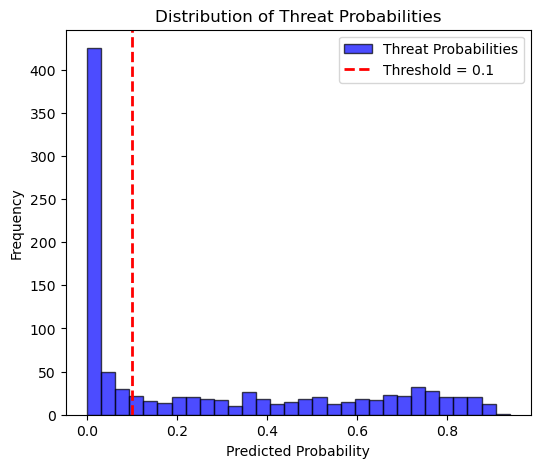

In [151]:
# Thrshold=0.1
evaluate_model(detoxify_unbiased['true_label'].to_numpy(),y_probs=detoxify_unbiased[['unbiased_threat', 'unbiased_identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.1,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.93      0.86      0.90       498
      Threat       0.87      0.94      0.90       498

    accuracy                           0.90       996
   macro avg       0.90      0.90      0.90       996
weighted avg       0.90      0.90      0.90       996


✅ Accuracy: 0.8996
✅ Precision: 0.8699
✅ Recall: 0.9398
✅ F1 Score: 0.9035


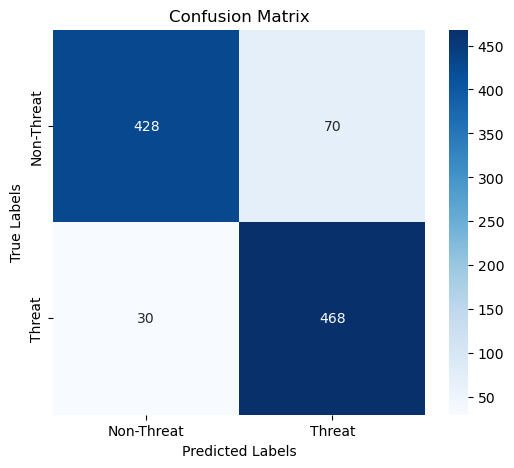

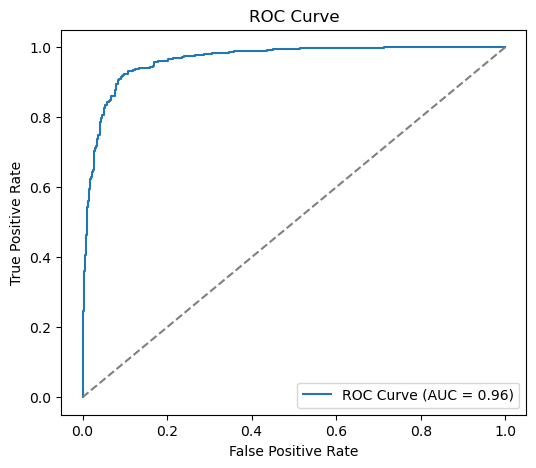

✅ AUC Score: 0.9635


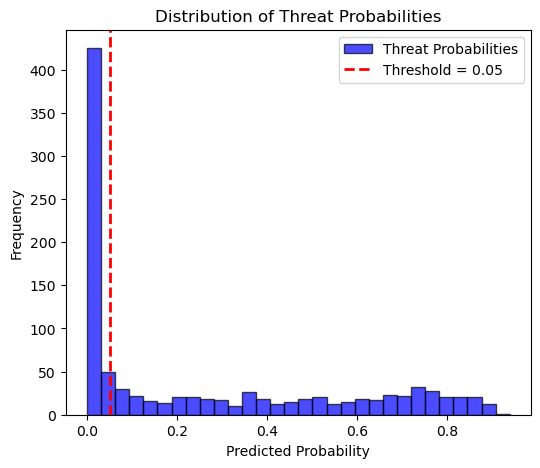

In [155]:
# Thrshold=0.05
evaluate_model(detoxify_unbiased['true_label'].to_numpy(),y_probs=detoxify_unbiased[['unbiased_threat', 'unbiased_identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.05,custom_condition=custom_threshold_condition)

### Dataset 3: Suspicious

In [158]:
detoxify_sus = pd.read_csv("detoxify_sus.csv")
detoxify_sus.head()

,message,label,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,0.006961,0.000096,0.000533,0.000129,0.000443,0.000178
1,is upset that he can't update his Facebook by ...,1,0.201620,0.000253,0.003418,0.000716,0.003902,0.000669
2,@Kenichan I dived many times for the ball. Man...,1,0.001220,0.000098,0.000187,0.000108,0.000201,0.000145
3,my whole body feels itchy and like its on fire,0,0.251167,0.001026,0.017238,0.001236,0.001639,0.000919
4,"@nationwideclass no, it's not behaving at all....",1,0.003601,0.000092,0.000269,0.000116,0.000265,0.000164



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      0.98      0.18      6145
      Threat       0.81      0.01      0.02     53855

    accuracy                           0.11     60000
   macro avg       0.46      0.50      0.10     60000
weighted avg       0.74      0.11      0.03     60000


✅ Accuracy: 0.1076
✅ Precision: 0.8127
✅ Recall: 0.0076
✅ F1 Score: 0.0150


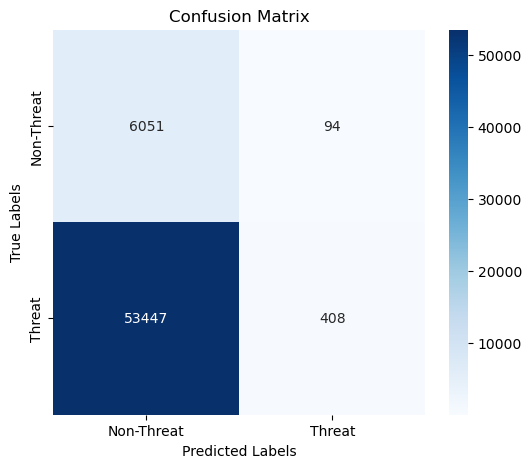

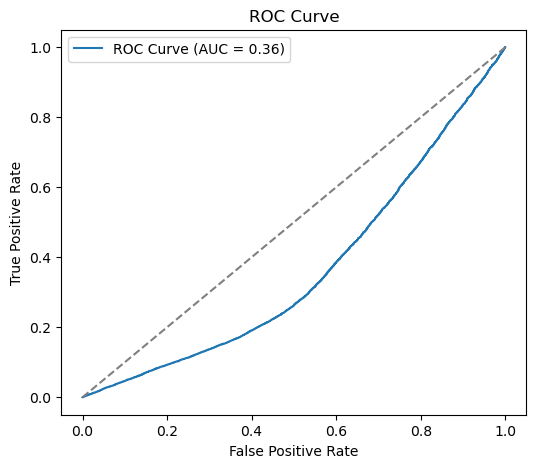

✅ AUC Score: 0.3633


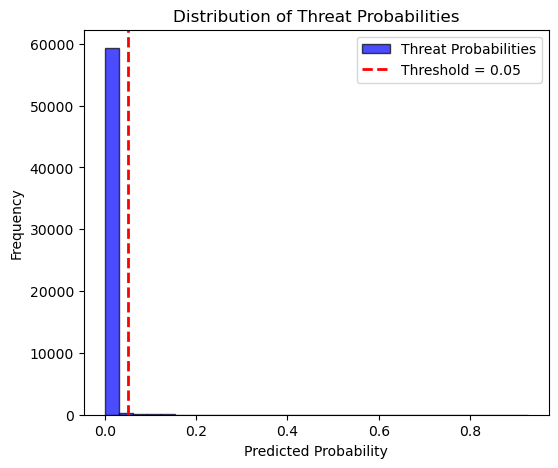

In [160]:
# Thrshold=0.05
evaluate_model(detoxify_sus['label'].to_numpy(),y_probs=detoxify_sus[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.05,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      0.96      0.18      6145
      Threat       0.81      0.02      0.04     53855

    accuracy                           0.12     60000
   macro avg       0.45      0.49      0.11     60000
weighted avg       0.73      0.12      0.06     60000


✅ Accuracy: 0.1169
✅ Precision: 0.8069
✅ Recall: 0.0212
✅ F1 Score: 0.0413


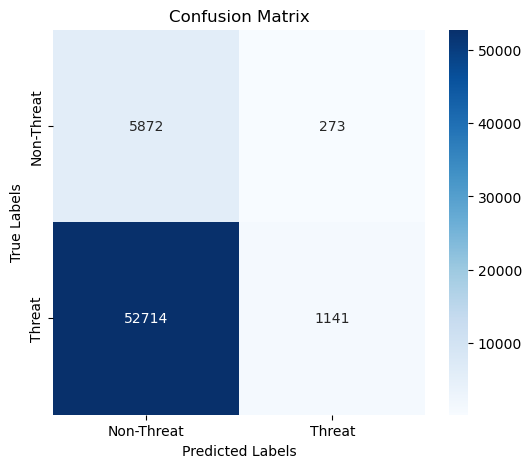

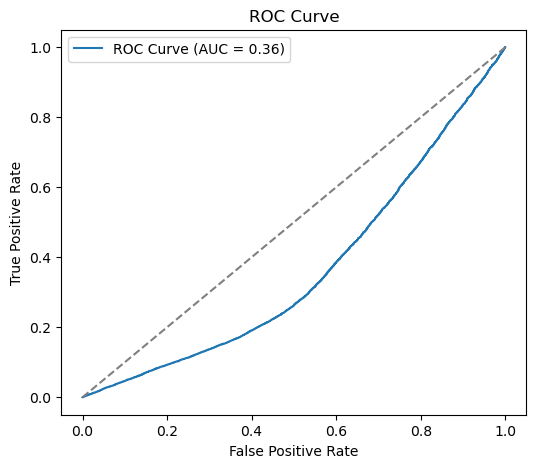

✅ AUC Score: 0.3633


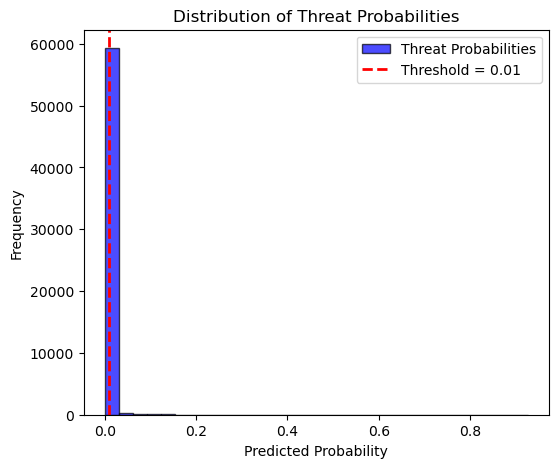

In [162]:
# Thrshold=0.01
evaluate_model(detoxify_sus['label'].to_numpy(),y_probs=detoxify_sus[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.01,custom_condition=custom_threshold_condition)

In [164]:
detoxify_unbiased = pd.read_csv("detoxify_unbiased_suspicious.csv")
detoxify_unbiased.head()

,message,label,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,0.005108,0.000003,0.000394,0.000163,0.001283,0.000056,0.000058
1,is upset that he can't update his Facebook by ...,1,0.002543,0.000002,0.000105,0.000180,0.000497,0.000068,0.000044
2,@Kenichan I dived many times for the ball. Man...,1,0.001766,0.000003,0.000122,0.000121,0.000351,0.000056,0.000095
3,my whole body feels itchy and like its on fire,0,0.023170,0.000013,0.001084,0.000696,0.002748,0.000658,0.000633
4,"@nationwideclass no, it's not behaving at all....",1,0.039335,0.000010,0.001244,0.001034,0.005948,0.000704,0.000148



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      0.98      0.18      6145
      Threat       0.72      0.01      0.01     53855

    accuracy                           0.11     60000
   macro avg       0.41      0.49      0.10     60000
weighted avg       0.66      0.11      0.03     60000


✅ Accuracy: 0.1066
✅ Precision: 0.7248
✅ Recall: 0.0075
✅ F1 Score: 0.0148


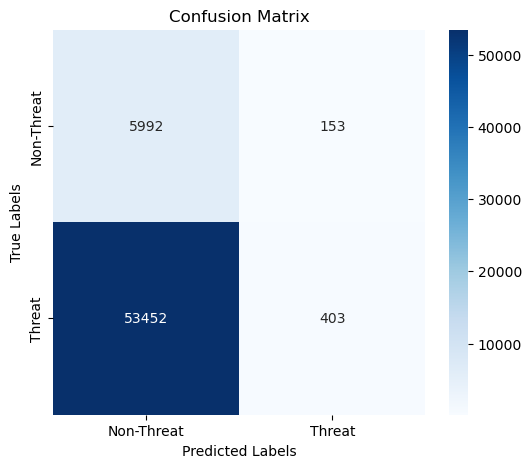

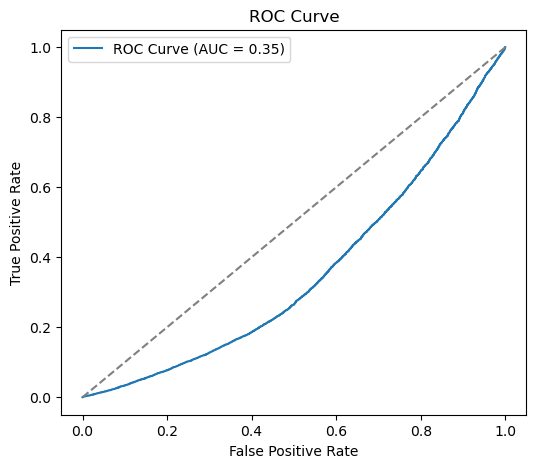

✅ AUC Score: 0.3531


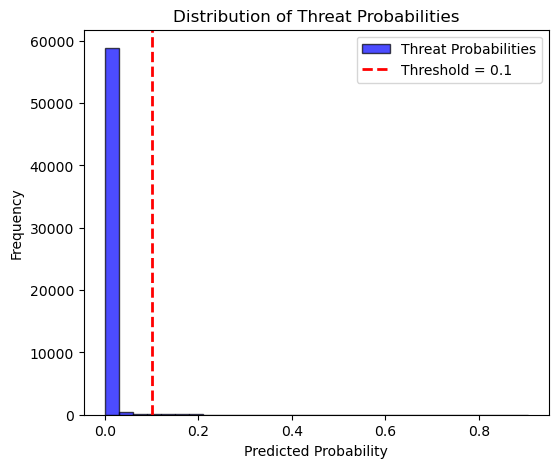

In [166]:
# Thrshold=0.1
evaluate_model(detoxify_unbiased['label'].to_numpy(),y_probs=detoxify_unbiased[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.1,custom_condition=custom_threshold_condition)


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.10      0.90      0.17      6145
      Threat       0.75      0.03      0.06     53855

    accuracy                           0.12     60000
   macro avg       0.42      0.47      0.12     60000
weighted avg       0.68      0.12      0.08     60000


✅ Accuracy: 0.1222
✅ Precision: 0.7466
✅ Recall: 0.0333
✅ F1 Score: 0.0638


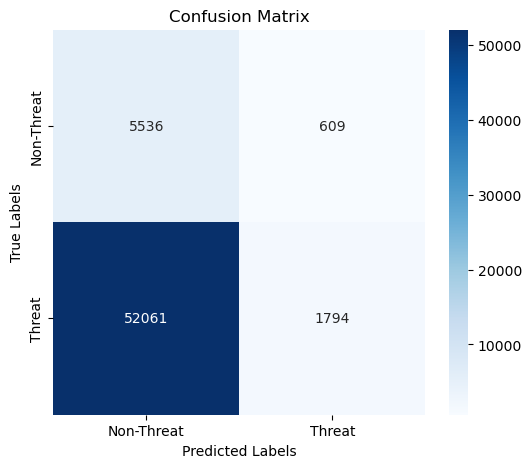

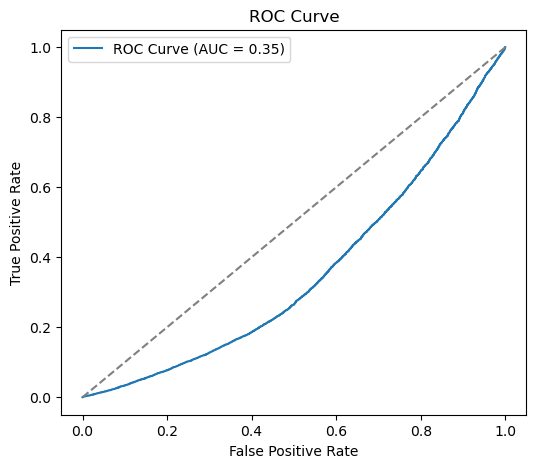

✅ AUC Score: 0.3531


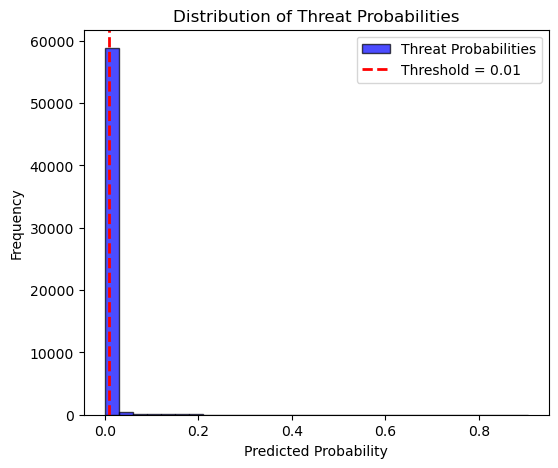

In [168]:
# Thrshold=0.01
evaluate_model(detoxify_unbiased['label'].to_numpy(),y_probs=detoxify_unbiased[['threat', 'identity_attack']].to_numpy(),class_labels=['Not Threat','Threat'],threshold=0.01,custom_condition=custom_threshold_condition)